In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mall.csv")

In [3]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


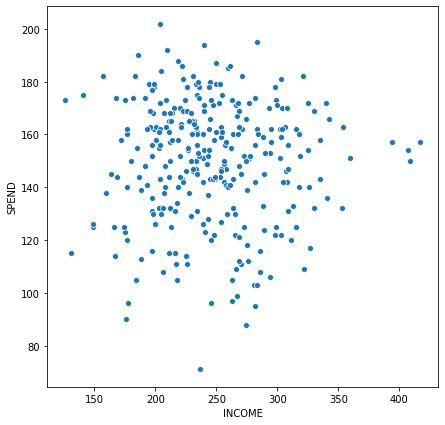

In [5]:
plt.figure(figsize=(7,7))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
k1=KMeans(n_clusters=3,n_init=10,max_iter=100,init="k-means++")

In [8]:
k1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
centroids=k1.cluster_centers_

In [15]:
k1.inertia_

297101.3764201943

In [20]:
centroids_df=pd.DataFrame(centroids,columns=["x","y"])

In [21]:
centroids_df

,x,y
0,196.682243,150.579439
1,317.550000,148.733333
2,251.617647,149.316176


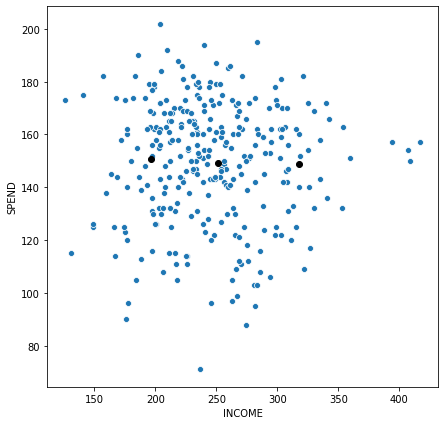

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.scatter(centroids_df["x"],centroids_df["y"],color="black")
plt.show()

In [23]:
wcss=[]

In [24]:
for k in range(1,30):
    k2=KMeans(n_clusters=k,n_init=10,max_iter=100,init="k-means++")
    #while plotting the centroids the default value is random so at this instance the machine plots the centroids randomly but using "k-means++" will place them at a better point where computing gets a bit easy.
    k2.fit(df)
    
    wcss.append(k2.inertia_)

In [26]:
labels = k2.predict(df)

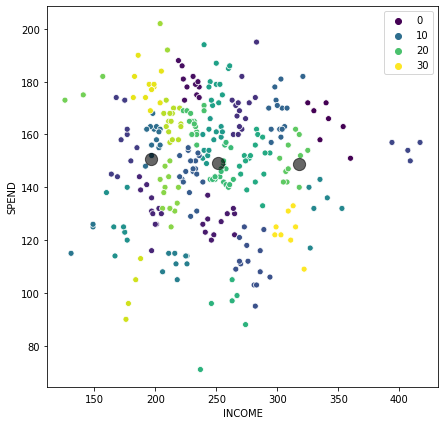

In [36]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df["INCOME"],y=df["SPEND"],hue=labels,palette="viridis")
plt.scatter(centroids_df["x"],centroids_df["y"], color='black',s=150, alpha=0.6);
plt.show()